In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [2]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [3]:
X = data.drop('Response', axis=1)
y = data['Response']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                10000 non-null  object 
 1   Age                   10000 non-null  int64  
 2   Driving_License       10000 non-null  int64  
 3   Region_Code           10000 non-null  float64
 4   Previously_Insured    10000 non-null  int64  
 5   Vehicle_Age           10000 non-null  object 
 6   Vehicle_Damage        10000 non-null  object 
 7   Annual_Premium        10000 non-null  float64
 8   Policy_Sales_Channel  10000 non-null  float64
 9   Vintage               10000 non-null  int64  
 10  Response              10000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB


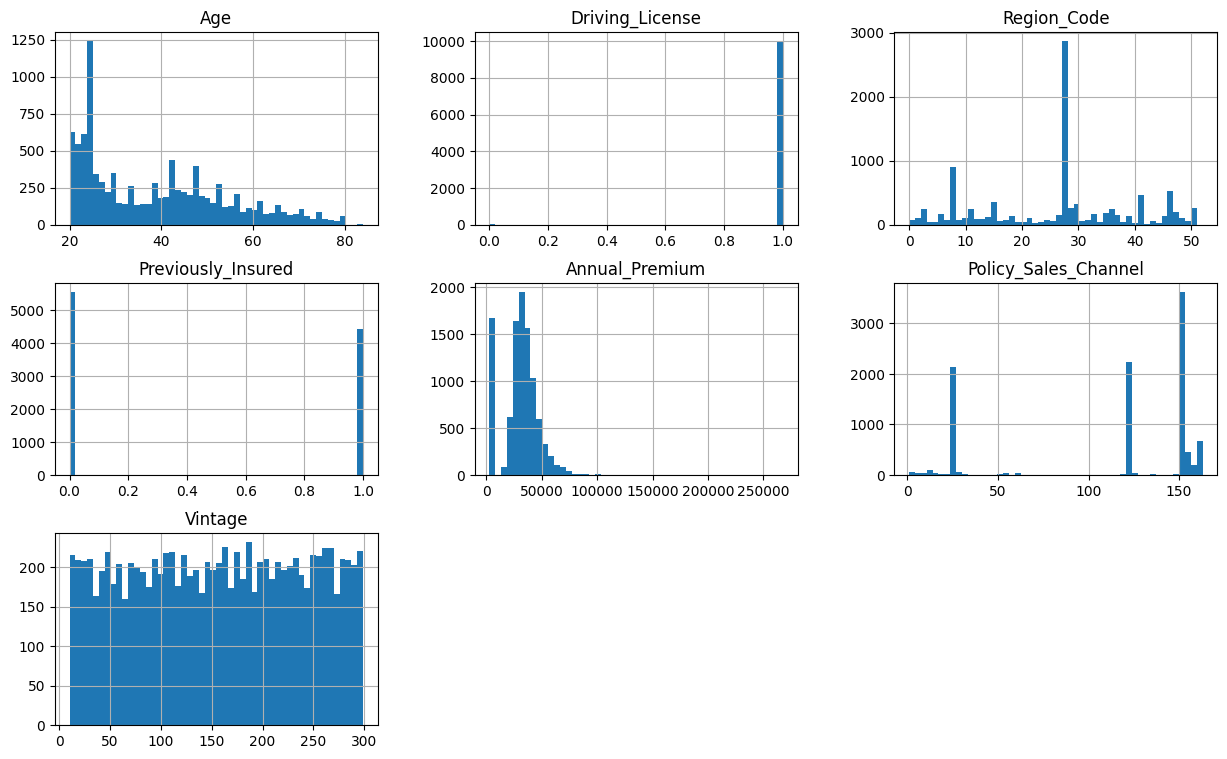

In [5]:
X.hist(bins=50, figsize=(15,9))
plt.show()

In [6]:
from pandas.plotting import scatter_matrix

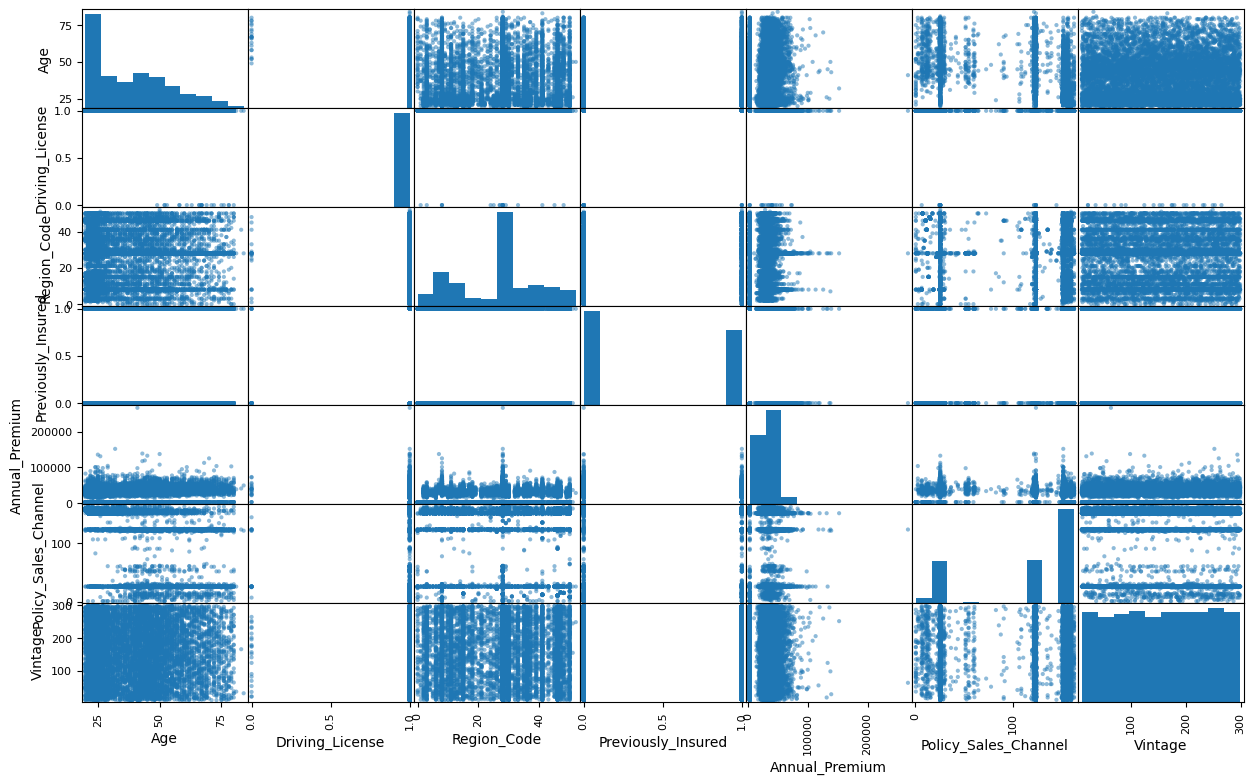

In [7]:
scatter_matrix(X, figsize=(15,9))
plt.show()

In [8]:
X.shape

(10000, 10)

In [10]:
cat_attribs = X.select_dtypes(include='object')

In [11]:
for col in cat_attribs:
    to_add = pd.get_dummies(X[col], prefix=col, drop_first=True)
    X = pd.concat((X, to_add), axis=1)
    X.drop(col, axis=1, inplace=True)

In [12]:
X.shape

(10000, 11)

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

# X = data.drop('Response', axis=1)
# y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=1,
                                 random_state=1,
                                 n_estimators=100)

gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1, random_state=1)

In [15]:
accuracy_train = gbc.score(X_train, y_train)
accuracy_test = gbc.score(X_test, y_test)

print(f'train: {accuracy_train}')
print(f'test: {accuracy_test}')

train: 0.927375
test: 0.8515


In [16]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc, f1_score

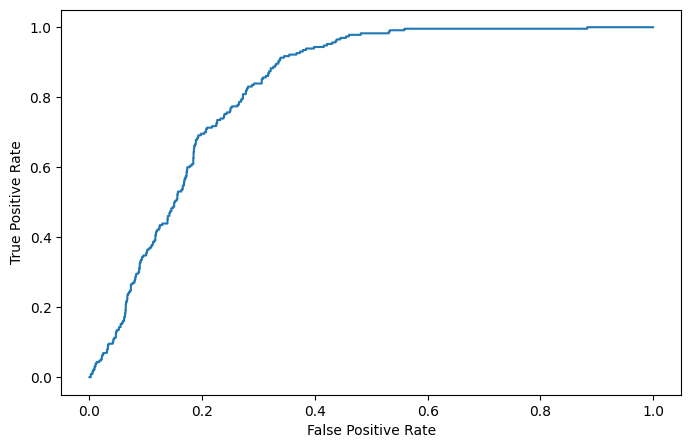

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [18]:
auc(fpr, tpr)

0.828168754605748

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [19]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]
f1 = []

In [20]:
for n in n_estimators_list:
    for l in learning_rate_list:
        gbc_test = GradientBoostingClassifier(learning_rate=l,
                                              n_estimators=n,
                                              random_state=1)
        
        gbc_test.fit(X_train, y_train)
        
        f1.append(f1_score(y_test, gbc_test.predict(X_test), average='weighted'))




In [54]:
gbc_test.feature_importances_

array([1.85559825e-01, 2.06071666e-04, 2.07084541e-02, 8.47859347e-02,
       4.89877023e-02, 6.97354012e-02, 3.77261631e-02, 2.59455926e-03,
       2.18903351e-02, 1.07406977e-02, 5.17064856e-01])

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [31]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

In [35]:
### random forest 5

f1_rfc_5_tr = {}
f1_rfc_5_tst = {}

for n in n_estimators_list:
    rfc_5 = RandomForestClassifier(max_depth=5, n_estimators=n)
    rfc_5.fit(X_train, y_train)
    f1_rfc_5_tr[n] = f1_score(y_train, rfc_5.predict(X_train), average='weighted')
    f1_rfc_5_tst[n] = f1_score(y_test, rfc_5.predict(X_test), average='weighted')
    

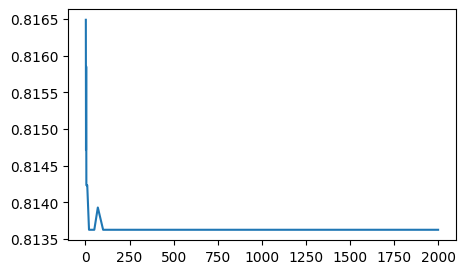

In [40]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tr.values())
plt.show()

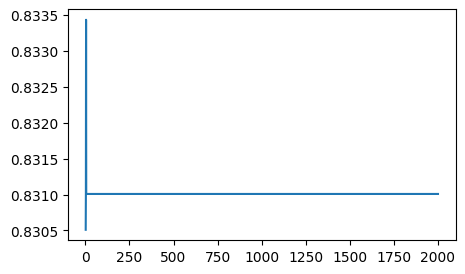

In [41]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tst.values())
plt.show()

In [42]:
### random forest 5000

f1_rfc_5_tr = {}
f1_rfc_5_tst = {}

for n in n_estimators_list:
    rfc_5 = RandomForestClassifier(max_depth=5000, n_estimators=n)
    rfc_5.fit(X_train, y_train)
    f1_rfc_5_tr[n] = f1_score(y_train, rfc_5.predict(X_train), average='weighted')
    f1_rfc_5_tst[n] = f1_score(y_test, rfc_5.predict(X_test), average='weighted')
    

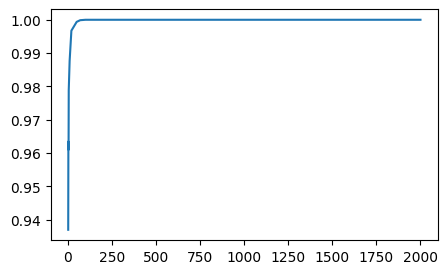

In [43]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tr.values())
plt.show()

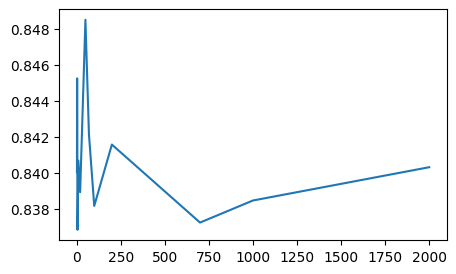

In [44]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tst.values())
plt.show()

In [45]:
### gradient boosting 5

f1_rfc_5_tr = {}
f1_rfc_5_tst = {}

for n in n_estimators_list:
    rfc_5 = GradientBoostingClassifier(max_depth=5, n_estimators=n)
    rfc_5.fit(X_train, y_train)
    f1_rfc_5_tr[n] = f1_score(y_train, rfc_5.predict(X_train), average='weighted')
    f1_rfc_5_tst[n] = f1_score(y_test, rfc_5.predict(X_test), average='weighted')
    

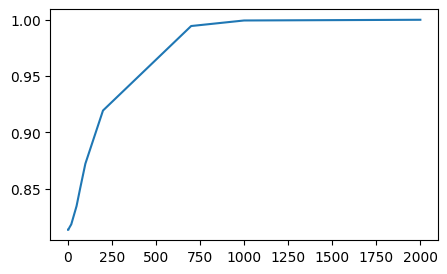

In [46]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tr.values())
plt.show()

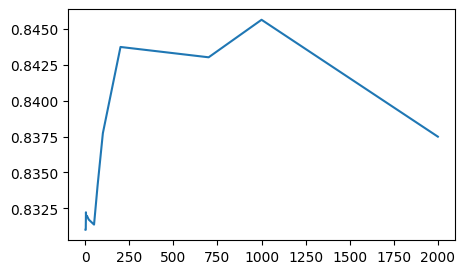

In [47]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tst.values())
plt.show()

In [48]:
### gradient boosting 5000

f1_rfc_5_tr = {}
f1_rfc_5_tst = {}

for n in n_estimators_list:
    rfc_5 = GradientBoostingClassifier(max_depth=5000, n_estimators=n)
    rfc_5.fit(X_train, y_train)
    f1_rfc_5_tr[n] = f1_score(y_train, rfc_5.predict(X_train), average='weighted')
    f1_rfc_5_tst[n] = f1_score(y_test, rfc_5.predict(X_test), average='weighted')
    

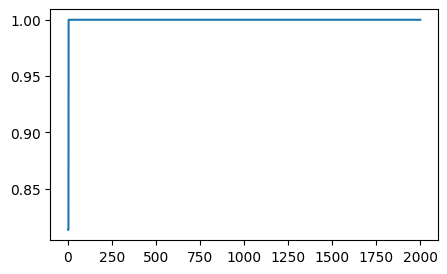

In [49]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tr.values())
plt.show()

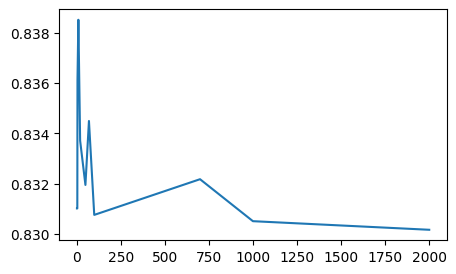

In [50]:
fig = plt.figure(figsize=(5,3), )
plt.plot(n_estimators_list, f1_rfc_5_tst.values())
plt.show()

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [56]:
cat_data = data.copy()

In [57]:
cat_data.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [58]:
cat_X = cat_data.drop('Response', axis=1)
cat_y = cat_data['Response']

In [59]:
from catboost import CatBoostClassifier

cat_c = list(cat_X.select_dtypes(include='object'))
cat_n = list(cat_X.select_dtypes(exclude='object'))

cat_c_idx = [list(cat_X.columns).index(col) for col in cat_c]
cat_n_idx = [list(cat_X.columns).index(col) for col in cat_n]

X_train_cat, X_test_cat, y_train_cat, y_test_cat=train_test_split(cat_X,
                                                                  cat_y,
                                                                  shuffle=True,
                                                                  random_state=0,
                                                                  test_size=.2)

cbc = CatBoostClassifier()

cbc.fit(X_train_cat, y_train_cat, cat_features=cat_c_idx)



Learning rate set to 0.025035
0:	learn: 0.6524209	total: 70.7ms	remaining: 1m 10s
1:	learn: 0.6213114	total: 77.9ms	remaining: 38.9s
2:	learn: 0.5922961	total: 83.4ms	remaining: 27.7s
3:	learn: 0.5658834	total: 88.5ms	remaining: 22s
4:	learn: 0.5423457	total: 93.1ms	remaining: 18.5s
5:	learn: 0.5180857	total: 97.6ms	remaining: 16.2s
6:	learn: 0.4986798	total: 102ms	remaining: 14.4s
7:	learn: 0.4802832	total: 106ms	remaining: 13.1s
8:	learn: 0.4619128	total: 110ms	remaining: 12.1s
9:	learn: 0.4465202	total: 114ms	remaining: 11.3s
10:	learn: 0.4341692	total: 118ms	remaining: 10.6s
11:	learn: 0.4204912	total: 122ms	remaining: 10s
12:	learn: 0.4147382	total: 125ms	remaining: 9.52s
13:	learn: 0.4094293	total: 129ms	remaining: 9.11s
14:	learn: 0.3996664	total: 133ms	remaining: 8.75s
15:	learn: 0.3902804	total: 137ms	remaining: 8.43s
16:	learn: 0.3851970	total: 141ms	remaining: 8.16s
17:	learn: 0.3768978	total: 145ms	remaining: 7.9s
18:	learn: 0.3694314	total: 149ms	remaining: 7.68s
19:	learn

201:	learn: 0.2622659	total: 783ms	remaining: 3.09s
202:	learn: 0.2622388	total: 786ms	remaining: 3.09s
203:	learn: 0.2621469	total: 790ms	remaining: 3.08s
204:	learn: 0.2621468	total: 792ms	remaining: 3.07s
205:	learn: 0.2621251	total: 796ms	remaining: 3.07s
206:	learn: 0.2620396	total: 800ms	remaining: 3.06s
207:	learn: 0.2619122	total: 805ms	remaining: 3.07s
208:	learn: 0.2618648	total: 809ms	remaining: 3.06s
209:	learn: 0.2617924	total: 813ms	remaining: 3.06s
210:	learn: 0.2617517	total: 817ms	remaining: 3.06s
211:	learn: 0.2616622	total: 821ms	remaining: 3.05s
212:	learn: 0.2615455	total: 825ms	remaining: 3.05s
213:	learn: 0.2614461	total: 829ms	remaining: 3.04s
214:	learn: 0.2613550	total: 832ms	remaining: 3.04s
215:	learn: 0.2612571	total: 836ms	remaining: 3.03s
216:	learn: 0.2612395	total: 838ms	remaining: 3.02s
217:	learn: 0.2611788	total: 842ms	remaining: 3.02s
218:	learn: 0.2610758	total: 846ms	remaining: 3.02s
219:	learn: 0.2610326	total: 849ms	remaining: 3.01s
220:	learn: 

363:	learn: 0.2500609	total: 1.38s	remaining: 2.41s
364:	learn: 0.2499715	total: 1.38s	remaining: 2.4s
365:	learn: 0.2499287	total: 1.39s	remaining: 2.4s
366:	learn: 0.2498401	total: 1.39s	remaining: 2.4s
367:	learn: 0.2497560	total: 1.39s	remaining: 2.4s
368:	learn: 0.2496598	total: 1.4s	remaining: 2.39s
369:	learn: 0.2495832	total: 1.4s	remaining: 2.39s
370:	learn: 0.2495604	total: 1.41s	remaining: 2.38s
371:	learn: 0.2495215	total: 1.41s	remaining: 2.38s
372:	learn: 0.2494233	total: 1.41s	remaining: 2.38s
373:	learn: 0.2493166	total: 1.42s	remaining: 2.37s
374:	learn: 0.2492068	total: 1.42s	remaining: 2.37s
375:	learn: 0.2491621	total: 1.42s	remaining: 2.36s
376:	learn: 0.2490647	total: 1.43s	remaining: 2.36s
377:	learn: 0.2489886	total: 1.43s	remaining: 2.35s
378:	learn: 0.2488081	total: 1.43s	remaining: 2.35s
379:	learn: 0.2487249	total: 1.44s	remaining: 2.35s
380:	learn: 0.2486454	total: 1.44s	remaining: 2.34s
381:	learn: 0.2485487	total: 1.45s	remaining: 2.34s
382:	learn: 0.2484

576:	learn: 0.2326781	total: 2.17s	remaining: 1.59s
577:	learn: 0.2326172	total: 2.17s	remaining: 1.58s
578:	learn: 0.2325580	total: 2.18s	remaining: 1.58s
579:	learn: 0.2324549	total: 2.18s	remaining: 1.58s
580:	learn: 0.2324123	total: 2.18s	remaining: 1.57s
581:	learn: 0.2323366	total: 2.19s	remaining: 1.57s
582:	learn: 0.2322742	total: 2.19s	remaining: 1.57s
583:	learn: 0.2322116	total: 2.19s	remaining: 1.56s
584:	learn: 0.2321133	total: 2.2s	remaining: 1.56s
585:	learn: 0.2320564	total: 2.21s	remaining: 1.56s
586:	learn: 0.2320385	total: 2.21s	remaining: 1.56s
587:	learn: 0.2319665	total: 2.22s	remaining: 1.55s
588:	learn: 0.2318867	total: 2.22s	remaining: 1.55s
589:	learn: 0.2318189	total: 2.23s	remaining: 1.55s
590:	learn: 0.2317448	total: 2.23s	remaining: 1.54s
591:	learn: 0.2316858	total: 2.24s	remaining: 1.54s
592:	learn: 0.2316034	total: 2.24s	remaining: 1.54s
593:	learn: 0.2315439	total: 2.24s	remaining: 1.53s
594:	learn: 0.2314468	total: 2.25s	remaining: 1.53s
595:	learn: 0

768:	learn: 0.2186509	total: 2.94s	remaining: 883ms
769:	learn: 0.2185235	total: 2.94s	remaining: 879ms
770:	learn: 0.2184987	total: 2.95s	remaining: 875ms
771:	learn: 0.2184031	total: 2.95s	remaining: 872ms
772:	learn: 0.2183639	total: 2.96s	remaining: 868ms
773:	learn: 0.2183175	total: 2.96s	remaining: 865ms
774:	learn: 0.2182531	total: 2.97s	remaining: 861ms
775:	learn: 0.2182052	total: 2.97s	remaining: 858ms
776:	learn: 0.2180965	total: 2.98s	remaining: 854ms
777:	learn: 0.2180518	total: 2.98s	remaining: 850ms
778:	learn: 0.2179551	total: 2.98s	remaining: 847ms
779:	learn: 0.2178411	total: 2.99s	remaining: 843ms
780:	learn: 0.2177485	total: 2.99s	remaining: 839ms
781:	learn: 0.2176810	total: 3s	remaining: 835ms
782:	learn: 0.2176143	total: 3s	remaining: 832ms
783:	learn: 0.2176098	total: 3.01s	remaining: 829ms
784:	learn: 0.2175131	total: 3.01s	remaining: 825ms
785:	learn: 0.2174180	total: 3.02s	remaining: 821ms
786:	learn: 0.2173499	total: 3.02s	remaining: 817ms
787:	learn: 0.2172

968:	learn: 0.2060222	total: 3.73s	remaining: 119ms
969:	learn: 0.2059369	total: 3.73s	remaining: 115ms
970:	learn: 0.2058749	total: 3.74s	remaining: 112ms
971:	learn: 0.2058222	total: 3.74s	remaining: 108ms
972:	learn: 0.2057878	total: 3.75s	remaining: 104ms
973:	learn: 0.2057254	total: 3.75s	remaining: 100ms
974:	learn: 0.2056345	total: 3.75s	remaining: 96.3ms
975:	learn: 0.2055899	total: 3.76s	remaining: 92.4ms
976:	learn: 0.2055315	total: 3.76s	remaining: 88.6ms
977:	learn: 0.2054950	total: 3.77s	remaining: 84.7ms
978:	learn: 0.2054371	total: 3.77s	remaining: 80.9ms
979:	learn: 0.2053710	total: 3.77s	remaining: 77ms
980:	learn: 0.2053281	total: 3.78s	remaining: 73.2ms
981:	learn: 0.2052700	total: 3.78s	remaining: 69.3ms
982:	learn: 0.2052351	total: 3.79s	remaining: 65.5ms
983:	learn: 0.2051874	total: 3.79s	remaining: 61.7ms
984:	learn: 0.2051474	total: 3.79s	remaining: 57.8ms
985:	learn: 0.2051202	total: 3.8s	remaining: 53.9ms
986:	learn: 0.2050592	total: 3.8s	remaining: 50.1ms
987

In [60]:
cbc.feature_importances_

array([ 3.1033428 , 11.36658464,  0.03227638,  7.43228013, 27.35891126,
        4.74671151, 21.36760853,  9.26128996,  6.2198574 ,  9.11113739])

In [65]:
pd.DataFrame(cbc.feature_importances_.reshape(1,10), columns=cat_X.columns)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,3.103343,11.366585,0.032276,7.43228,27.358911,4.746712,21.367609,9.26129,6.219857,9.111137


**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

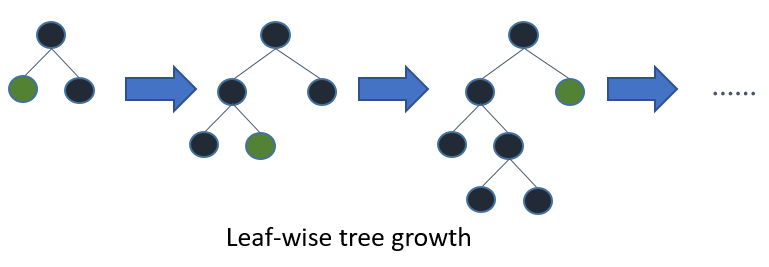

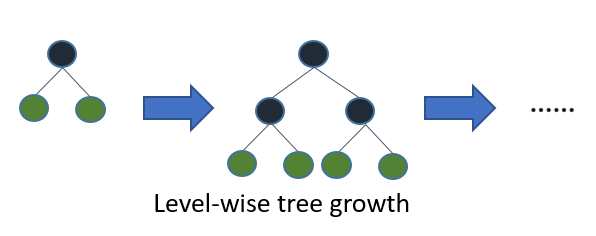

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [86]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

lgbm = LGBMClassifier()

search = GridSearchCV(lgbm, param_grid=params)

search.fit(X_train, y_train)




GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]})

In [76]:
from sklearn.metrics import classification_report

In [87]:
y_pred = search.predict(X_test)

In [88]:
cr = classification_report(y_test, y_pred)

In [90]:
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1770
           1       0.00      0.00      0.00       230

    accuracy                           0.89      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.78      0.89      0.83      2000

